In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.ticker as mticker
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
weather=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\gsom_seasonal.csv')
tract=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\seasonal_by_tract.csv')
station=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\tracts_with_nearest_stations.csv')


In [4]:
CP_tract=station[station['station'].str.match(
    'NY CITY CENTRAL PARK, NY US')]['boro_ct201']
JFK_tract=station[station['station'].str.match(
    'JFK INTERNATIONAL AIRPORT, NY US')]['boro_ct201']
LAG_tract=station[station['station'].str.match(
    'LA GUARDIA AIRPORT, NY US')]['boro_ct201']

In [5]:
heating=tract[tract['complaint_type'].str.match('HEATING')]
heating.head(2)

complaint_type created_date  1000100  1000201  1000202  1000500  1000600  \
32        HEATING     3/1/2004      NaN      1.0      1.0      NaN     21.0   
55        HEATING     6/1/2004      NaN      1.0      2.0      NaN      1.0   

    1000700  1000800  1000900   ...     5027706  5027900  5029102  5029103  \
32      NaN     28.0      NaN   ...         NaN      NaN      NaN      NaN   
55      1.0     15.0      NaN   ...         NaN      NaN      NaN      NaN   

    5029104  5030301  5030302  5031901  5031902  5032300  
32      1.0      1.0      1.0      NaN      4.0      NaN  
55      NaN      NaN      1.0      NaN     19.0      NaN  

[2 rows x 2165 columns]

In [6]:
len(heating)

41

In [7]:
z=set(heating.columns.values[2::1].astype(int)) & set(CP_tract)
z1=set(heating.columns.values[2::1].astype(int)) & set(JFK_tract)
z2=set(heating.columns.values[2::1].astype(int)) & set(LAG_tract)

In [8]:
tavg=weather[weather['datatype'].str.match('TAVG')]

tavg=tavg.reset_index()
tavg=tavg.drop('index',1)
tavg.head()

date datatype  LA GUARDIA AIRPORT, NY US  NY CITY CENTRAL PARK, NY US  \
0  12/1/2003     TAVG                  -0.800000                    -1.150000   
1   3/1/2004     TAVG                  12.000000                    12.266667   
2   6/1/2004     TAVG                  23.666667                    22.966667   
3   9/1/2004     TAVG                  15.066667                    14.333333   
4  12/1/2004     TAVG                   1.600000                     1.866667   

   JFK INTERNATIONAL AIRPORT, NY US  
0                         -1.400000  
1                         11.300000  
2                         22.533333  
3                         14.466667  
4                          1.366667

In [9]:
import numpy as np
number=np.arange(42,55,1)
tavg1=tavg.drop(tavg.index[number])


In [10]:
Newtavg=tavg1.drop(0)

In [11]:
Newtavg.shape

(41, 5)

In [12]:
I=dict()
J=dict()
K=dict()

#z is central park
for i in z:
    I[i]=heating['%d'%i]
    
#z1 is JFK 
for i in z1:
    J[i]=heating['%d'%i]
    
#z2 is LAG
for i in z2:
    K[i]=heating['%d'%i]

hi1=pd.DataFrame(I)#central park 
hi1=hi1.reset_index()
hi1=hi1.drop('index',1)

hi2=pd.DataFrame(J)##JFK
hi2=hi2.reset_index()
hi2=hi2.drop('index',1)

hi3=pd.DataFrame(K)#LAG
hi3=hi3.reset_index()
hi3=hi3.drop('index',1)

In [13]:
hi1.head(1)

1000100  1000201  1000202  1000500  1000600  1000700  1000800  1000900  \
0      NaN      1.0      1.0      NaN     21.0      NaN     28.0      NaN   

   1001001  1001002   ...     5027706  5027900  5029102  5029103  5029104  \
0      NaN      NaN   ...         NaN      NaN      NaN      NaN      1.0   

   5030301  5030302  5031901  5031902  5032300  
0      1.0      1.0      NaN      4.0      NaN  

[1 rows x 943 columns]

In [14]:
hi2.head(1)

3036001  3036002  3036200  3056600  3056800  3057000  3057200  3057400  \
0      5.0      6.0      5.0      NaN      NaN      1.0      NaN      NaN   

   3057600  3059000   ...     4155101  4155102  4156700  4157101  4157102  \
0      NaN      NaN   ...         NaN      3.0      NaN      NaN      NaN   

   4157901  4157902  4157903  4161700  4162100  
0      NaN      NaN      1.0      NaN      8.0  

[1 rows x 354 columns]

In [15]:
hi3.head(1)

1030900  2000100  2000200  2000400  2001600  2001900  2002000  2002400  \
0      4.0      NaN      6.0      NaN      4.0      NaN     12.0      NaN   

   2002500  2002701   ...     4142900  4143500  4144700  4145101  4145102  \
0      5.0      NaN   ...         NaN      NaN      NaN      NaN      NaN   

   4145900  4146300  4146700  4147100  4148300  
0      NaN      1.0      NaN      NaN      NaN  

[1 rows x 866 columns]

In [16]:
correlation=dict()
for i in hi1.columns.values:
    correlation[i]=hi1[i].corr(Newtavg['NY CITY CENTRAL PARK, NY US'])
for i in hi2.columns.values:
    correlation[i]=hi2[i].corr(Newtavg['JFK INTERNATIONAL AIRPORT, NY US'])
for i in hi3.columns.values:
    correlation[i]=hi3[i].corr(Newtavg['LA GUARDIA AIRPORT, NY US'])

C:\Users\xuebi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\xuebi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [16]:
correlation

{1000100: nan,
 1000201: -0.095104458257185498,
 1000202: 0.13372092796152729,
 1000500: nan,
 1000600: 0.38017156116540962,
 1000700: 0.26264206406547352,
 1000800: 0.42114502819239713,
 1000900: 0.11572571841501435,
 1001001: -0.074104084098587278,
 1001002: nan,
 1001200: 0.15738819402807894,
 1001300: 0.2455614055434148,
 1001401: 0.19497817901486053,
 1001402: 0.14730689676093323,
 1001501: 0.37609166666349886,
 1001502: 0.31004861026068015,
 1001600: 0.27181211957793849,
 1001800: 0.36947624331455725,
 1002000: 1.0,
 1002100: -0.18085071615139325,
 1002201: 0.36780677453032112,
 1002202: 0.28320524171688216,
 1002400: nan,
 1002500: nan,
 1002601: 0.30089329996726266,
 1002602: 0.23909169927048987,
 1002700: 0.17949412065855125,
 1002800: 0.37214140291868003,
 1002900: 0.26714565504557375,
 1003001: 0.36665366070700067,
 1003002: 0.0047144630058451875,
 1003100: 0.094139514223226292,
 1003200: 0.26275198839816433,
 1003300: 0.36655461717263277,
 1003400: 0.32884137329338908,
 100

In [17]:
S=pd.Series(correlation).to_frame()
S.head()

0
1000100       NaN
1000201 -0.095104
1000202  0.133721
1000500       NaN
1000600  0.380172

In [18]:
Newin=S.index.astype(str).values
S1=S.set_index(Newin)
S1.index

Index(['1000100', '1000201', '1000202', '1000500', '1000600', '1000700',
       '1000800', '1000900', '1001001', '1001002',
       ...
       '5027706', '5027900', '5029102', '5029103', '5029104', '5030301',
       '5030302', '5031901', '5031902', '5032300'],
      dtype='object', length=2163)

In [19]:
import geopandas as gpd
shpfile = 'C:\\Users\\xuebi\\Desktop\\census_tracts\\census_tracts\\census2010.shp'
coord_system = {'init': 'epsg:4326'}#tells how the earth exist 
gdf = gpd.GeoDataFrame.from_file(shpfile, crs=coord_system)

In [20]:
gdf.head()

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel  \
0         5    5000900  Staten Island          I  000900       9   
1         1    1009800      Manhattan          I  009800      98   
2         1    1010000      Manhattan          I  010000     100   
3         1    1010200      Manhattan          I  010200     102   
4         1    1010400      Manhattan          I  010400     104   

                                            geometry ntacode  \
0  POLYGON ((-74.07920577013245 40.64343078374567...    SI22   
1  POLYGON ((-73.96432543478758 40.75638153099091...    MN19   
2  POLYGON ((-73.96802436915851 40.75957814005282...    MN19   
3  POLYGON ((-73.97124277307127 40.76093641847906...    MN17   
4  POLYGON ((-73.97445730550224 40.76229308352487...    MN17   

                                     ntaname  puma    shape_area   shape_leng  
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794  
1                    Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811  
2                    Turtle Bay-East Midtown  3808  1.860938e+06  5692.168737  
3                      Midtown-Midtown South  3807  1.860993e+06  5687.802439  
4                      Midtown-Midtown South  3807  1.864600e+06  5693.036367

In [21]:
tracts=gdf[['boro_ct201','geometry']].merge(S1,
                   left_on='boro_ct201',right_index=True)
tracts.head()

boro_ct201                                           geometry         0
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...  0.235109
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...  0.252728
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...  0.108558
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906... -0.077797
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...  0.360800

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


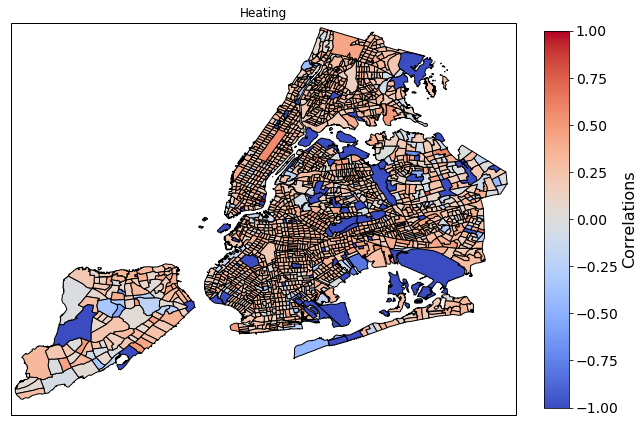

In [22]:
%matplotlib inline
cmap=mcm.coolwarm
norm=mcolors.Normalize(vmin=-1,vmax=1)
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Heating")
for _, row in tracts.iterrows():
    color = cmap(norm(row[0]))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='black')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("Correlations" , fontsize=16)
fig.savefig('Corr heat')

In [ ]:
sd